# <수상작 리뷰>

## 신용카드 사기 거래 탐지 AI 경진대회 월간 데이콘

https://dacon.io/competitions/official/235930/codeshare/7604?utm_source=chatgpt.com

**<코드 과정>**

1) 각기 다른 값을 도출한 데이터
-> 데이터 별로 다른 차원 축소 기법 사용 :SparsePCA ,FastICA, Truncated SVD 등,,

2) Auto Encoder에 학습시킴

3) Voting 방식으로 앙상블


위 수상작 리뷰에서는 데이터의 패턴을 보고 서로 다른 차원 축소 기법을 사용하여 진행하였는데, 위 코드를 보면서 잘 모르는 개념에 대해서 정리해봤습니다.


<차원축소>

차원축소의 장점

1. 학습데이터 크기를 줄여서 학습시간을 절약할 수 있다
2. 불필요한 피처들을 줄여서 모델 성능 향상에 기여할 수 있다
3. 다차원의 데이터를 3차원 이하의 차원 축소를 통해서 시각적으로 보다 쉽게 패턴을 인지할 수 있다
4. 다차원의 데이터를 차원축소시켜 더 데이터를 잘 설명할 수 있는 잠재적(Latent)인 요소를 추출할 수 있다.

### 1) PCA

-차원축소하는 기법으로 고차원의 원본데이터를 **저차원의 부분공간으로 투영**하여 데이터를 축소하는 기법

1. **원본 데이터 변동성(Variance)이 가장 큰 방향**으로 순차적으로 축을 생성하고 이렇게 생성된 축으로 데이터를 투영하는 방식
2. 첫번째 축이 만들어지면 두번째 축은 첫번째 축을 제외하고 그다음으로 변동성이 큰 축을 설정->이는 첫번째 축에 직각이 되는 벡터(직교 벡터)축
3. 세번째 축은 다시 두번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성

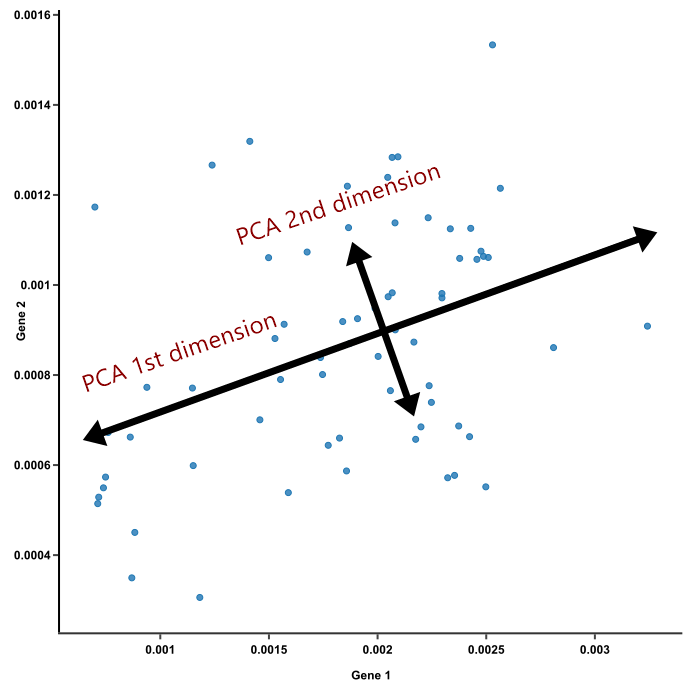

2) LDA
- 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, LDA는 지도학습의 분류에서 사용하기 쉽도록 **개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소**한다.
-> 즉, PCA는 **입력 데이터의 변동성의 가장 큰 축**을 찾았지만, LDA는 **입력 데이터의 결정 값 클래스를 최대한으로 분리**할 수 있는 축을 찾는다.
-> LDA는 같은 클래스의 데이터는 최대한 근접해서, 다른 클래스의 데이터는 최대한 떨어뜨리는 축 매핑

방식
-특정 공간 상에서 클래스 분리를 최대화하는 축을 찾기 위해 **클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식**으로 차원을 축소

-> 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식이다.

### 3) SparsePCA

-일반 PCA의 특별한 단점은 주성분이 일반적으로 모든 입력 변수의 선형 결합이다.

SPCA는 **소수의 입력 변수**의 선형 결합인 성분을 찾아 이러한 단점을 극복한다.

In [ ]:
dimesion_reducer = SparsePCA(n_components=128,
                             alpha=0.001,
                             random_state=random_state)

  PCA_train = dimesion_reducer.fit_transform(train)
  PCA_val = dimesion_reducer.transform(val)
  PCA_test = dimesion_reducer.transform(test)

  PCA_train = pd.DataFrame(PCA_train)
  PCA_val = pd.DataFrame(PCA_val)
  PCA_test = pd.DataFrame(PCA_test)

### 4) FastICA

-독립 성분 분석(ICA)은 **비지도 학습 기법**으로, 데이터의 숨겨진 독립적인 구성 요소를 추출하는 데 사용한다고 한다.

->FastICa는 확률적 방법과 비선형 성분 고찰을 사용하여 독립 성분을 빠르게 추출

In [ ]:
 dimesion_reducer = FastICA(n_components=128,
                             algorithm='parallel',
                             whiten=True,
                             max_iter=100,
                             random_state=42)

  ICA_train = dimesion_reducer.fit_transform(train)
  ICA_val = dimesion_reducer.transform(val)
  ICA_test = dimesion_reducer.transform(test)

  ICA_train = pd.DataFrame(ICA_train)
  ICA_val = pd.DataFrame(ICA_val)
  ICA_test = pd.DataFrame(ICA_test)

## Random Projection

다차원 데이터를 저차원으로 **무작위 투영**해도 데이터의 유클리드 거리가 거의 보존된다는 것을 보장하여, 유사성을 유지하며 효과적으로 차원을 축소 할 수 있음

**1) GaussianRandomProjection**
- 랜덤한 가우시안 행렬을 생성하여 투영
- 밀집된 행렬을 사용 -> 계산량 많음

**2) SparseRandomProjection**
- 희소행렬을 사용-> 계산량이 적음
- 특정한 조검에서 -1,0,1값만을 가지는 행렬을 생성-> 연산속도 향상
- 계산량이 줄어 대규모 데이터 셋에서 효율적



In [ ]:
  dimesion_reducer = SparseRandomProjection(n_components=128,
                                          eps=0.1,
                                          random_state=42)

  SRP_train = dimesion_reducer.fit_transform(train)
  SRP_val = dimesion_reducer.transform(val)
  SRP_test = dimesion_reducer.transform(test)

  SRP_train = pd.DataFrame(SRP_train)
  SRP_val = pd.DataFrame(SRP_val)
  SRP_test = pd.DataFrame(SRP_test)